In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import datetime, timedelta

In [2]:
file_path = Path("all_features.csv")
combined_df = pd.read_csv(file_path, infer_datetime_format = True, parse_dates = True, index_col = "date_time")
combined_df.sort_index(inplace=True)

In [3]:
combined_df.head()

,close,vol,spy,return,Beta,WR,RSI,OBV,sentiment_vader,sentiment_rnn,us2y10y,vix,usdjpy
date_time,,,,,,,,,,,,,
2021-01-28 09:30:00,290.00,719438,376.50,-0.159420,-5.021900,-3.846154,24.616808,1063543.0,-1.0,-1.0,91.536,30.21,104.36
2021-01-28 09:31:00,300.16,48204,376.78,0.035034,-4.692537,-100.000000,29.976045,1111747.0,1.0,1.0,91.536,30.17,104.33
2021-01-28 09:32:00,300.16,48204,376.76,0.000000,-4.693024,-82.237762,30.142002,1159951.0,0.0,0.0,91.536,30.24,104.31
2021-01-28 09:33:00,300.16,48204,377.04,0.000000,-4.658830,-82.237762,30.632934,1208155.0,0.0,0.0,91.706,29.96,104.30
2021-01-28 09:34:00,300.16,48204,376.83,0.000000,-4.686281,-82.237762,31.696730,1256359.0,0.0,0.0,91.875,29.75,104.31


In [4]:
combined_df['target_return'] = combined_df['return'].shift(-1)
combined_df = combined_df.dropna()

In [5]:
#combined_df

In [6]:
X = combined_df[['return', 'Beta', 'WR', 'RSI', 'OBV', 'sentiment_vader', 'sentiment_rnn', 'us2y10y', 'vix', 'usdjpy']]

In [7]:
#y = combined_df[['target_return']]
target = combined_df.iloc[:,13]
y = target.values.reshape(-1, 1)


In [8]:
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [9]:
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [10]:
# define model #https://github.com/iambharathvaj/Stock-Price-Prediction/blob/master/Apple%20-%20Stock%20Price%20Prediction.ipynb
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
# define model evaluation method
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
# Score of the Lasso Regression Model (Using the Test Data)
lasso_model_score = lasso_model.score(X_test, y_test)
print('Lasso Model score:', lasso_model_score)

Lasso Model score: -0.0006394617919847079


In [11]:
# Define the Real & Prediction Values

#lasso_model_predict_prediction = lasso_model.predict(X_test)
#lasso_model_real_prediction = lasso_model.predict(y_test)

In [12]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, lasso_model.predict(X_test))

2.9791940254491094e-05

In [13]:
y_pred = lasso_model.predict(X_test)

In [14]:
y_pred

array([0.24332105, 0.24332105, 0.24332105, ..., 0.24332105, 0.24332105,
       0.24332105])

In [15]:
output = pd.DataFrame({"target": y_test.ravel(), "estimated": y_pred})

In [16]:
predicted_prices = scaler.inverse_transform(y_pred.reshape(-1,1))
real_prices = scaler.inverse_transform(y_test)

In [17]:
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = combined_df.index[-len(real_prices): ])
stocks.head()

,Real,Predicted
date_time,,
2021-03-12 14:41:00,-0.000182,0.000137
2021-03-12 14:42:00,0.001113,0.000137
2021-03-12 14:43:00,0.003020,0.000137
2021-03-12 14:44:00,0.003996,0.000137
2021-03-12 14:45:00,0.003702,0.000137


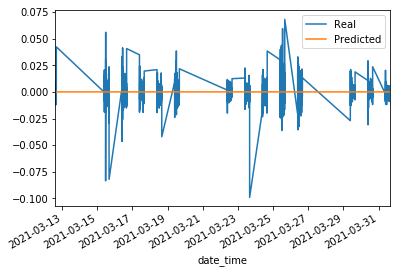

In [18]:
stocks.plot()

In [19]:
real_prices

array([[-1.81857860e-04],
       [ 1.11317254e-03],
       [ 3.01966598e-03],
       ...,
       [-4.68847677e-05],
       [-4.27713323e-03],
       [-5.85988594e-03]])

In [20]:
combined_df.tail()

,close,vol,spy,return,Beta,WR,RSI,OBV,sentiment_vader,sentiment_rnn,us2y10y,vix,usdjpy,target_return
date_time,,,,,,,,,,,,,,
2021-03-31 15:54:00,192.451,19272,396.600,0.001306,2.914251,-9.956367,72.658641,67663735.0,0.0,0.0,157.321,18.89,110.75,-0.002447
2021-03-31 15:55:00,191.980,15778,396.345,-0.002447,2.943117,0.000000,70.208991,67647957.0,0.0,0.0,157.142,19.01,110.73,-0.000104
2021-03-31 15:56:00,191.960,13801,396.520,-0.000104,2.864469,-27.447552,63.737565,67634156.0,0.0,0.0,156.964,18.99,110.73,-0.000047
2021-03-31 15:57:00,191.951,21260,396.520,-0.000047,2.920564,-28.613054,60.113960,67612896.0,0.0,0.0,157.142,18.97,110.73,-0.004277
2021-03-31 15:58:00,191.130,20765,396.830,-0.004277,2.420114,-29.137529,52.606528,67592131.0,0.0,0.0,157.142,18.95,110.72,-0.005860


In [22]:
real_prices[-1]

array([-0.00585989])

In [26]:
# List the features sorted in descending order by feature importance
feature_importance = pd.DataFrame(combined_df, columns = ['return', 'Beta', 'WR', 'RSI', 'OBV', 'sentiment_vader', 'sentiment_rnn', 'us2y10y', 'vix', 'usdjpy'])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()
importances = combined_df.feature_importances_
sorted(zip(combined_df.feature_importances_, X.columns), reverse=True)


NameError: name 'math' is not defined

In [21]:
# List the features sorted in descending order by feature importance
importances = lasso_model.feature_importances_
sorted(zip(combined_df.feature_importances_, X.columns), reverse=True)
#question: can we list feature importance when we do linear regression or is this for classification only?

AttributeError: 'Lasso' object has no attribute 'feature_importances_'

In [24]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(combined_df.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)


AttributeError: 'DataFrame' object has no attribute 'feature_importances_'